In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2018y19 = pd.read_csv('espana-master/2010s/2018-19/es.1.csv')
new = df_laliga_2018y19['FT'].str.split('-',n=1,expand=True)
df_laliga_2018y19['GolesLocal']=new[0]
df_laliga_2018y19['GolesVisitante']=new[1]
df_laliga_2018y19

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Fri Aug 17 2018,Girona FC,0-0,Real Valladolid CF,0,0
1,1,Fri Aug 17 2018,Real Betis,0-3,Levante UD,0,3
2,1,Sat Aug 18 2018,RC Celta Vigo,1-1,RCD Espanyol,1,1
3,1,Sat Aug 18 2018,Villarreal CF,1-2,Real Sociedad,1,2
4,1,Sat Aug 18 2018,FC Barcelona,3-0,Deportivo Alavés,3,0
...,...,...,...,...,...,...,...
375,38,Sat May 18 2019,SD Huesca,2-1,CD Leganés,2,1
376,38,Sat May 18 2019,RC Celta Vigo,2-2,Rayo Vallecano,2,2
377,38,Sat May 18 2019,Deportivo Alavés,2-1,Girona FC,2,1
378,38,Sun May 19 2019,Real Madrid,0-2,Real Betis,0,2


In [3]:
df_laliga_2018y19['GolesLocal']=pd.to_numeric(df_laliga_2018y19['GolesLocal'], downcast="float")
df_laliga_2018y19['GolesVisitante']=pd.to_numeric(df_laliga_2018y19['GolesVisitante'], downcast="float")
df_laliga_2018y19['TotalGolesPartido'] = df_laliga_2018y19['GolesLocal']+df_laliga_2018y19['GolesVisitante']
df_laliga_2018y19

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Fri Aug 17 2018,Girona FC,0-0,Real Valladolid CF,0.0,0.0,0.0
1,1,Fri Aug 17 2018,Real Betis,0-3,Levante UD,0.0,3.0,3.0
2,1,Sat Aug 18 2018,RC Celta Vigo,1-1,RCD Espanyol,1.0,1.0,2.0
3,1,Sat Aug 18 2018,Villarreal CF,1-2,Real Sociedad,1.0,2.0,3.0
4,1,Sat Aug 18 2018,FC Barcelona,3-0,Deportivo Alavés,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...
375,38,Sat May 18 2019,SD Huesca,2-1,CD Leganés,2.0,1.0,3.0
376,38,Sat May 18 2019,RC Celta Vigo,2-2,Rayo Vallecano,2.0,2.0,4.0
377,38,Sat May 18 2019,Deportivo Alavés,2-1,Girona FC,2.0,1.0,3.0
378,38,Sun May 19 2019,Real Madrid,0-2,Real Betis,0.0,2.0,2.0


In [5]:
df_laliga_2018y19['TotalGolesPartido'].describe()

count    380.000000
mean       2.586842
std        1.630946
min        0.000000
25%        1.000000
50%        2.000000
75%        3.250000
max       10.000000
Name: TotalGolesPartido, dtype: float64

In [4]:
df_laliga_2018y19['TotalGolesPartido'].sum()

983.0

In [6]:
RealMadridL_7 = df_laliga_2018y19.loc[df_laliga_2018y19['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_7.reset_index(inplace=True)

RealMadridL_7

,index,GolesLocal
0,7,2.0
1,24,4.0
2,44,1.0
3,63,0.0
4,80,1.0
5,101,2.0
6,134,2.0
7,153,1.0
8,177,0.0
9,191,2.0


In [7]:
RealMadridV_7 = df_laliga_2018y19.loc[df_laliga_2018y19['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_7.reset_index(inplace=True)

RealMadridV_7

,index,GolesVisitante
0,16,4.0
1,33,1.0
2,54,0.0
3,72,0.0
4,97,1.0
5,119,4.0
6,121,0.0
7,146,1.0
8,169,2.0
9,188,2.0


In [8]:
Madrid_Tot_7=pd.merge(RealMadridL_7, RealMadridV_7, left_index=True, right_index=True)
Madrid_Tot_7

,index_x,GolesLocal,index_y,GolesVisitante
0,7,2.0,16,4.0
1,24,4.0,33,1.0
2,44,1.0,54,0.0
3,63,0.0,72,0.0
4,80,1.0,97,1.0
5,101,2.0,119,4.0
6,134,2.0,121,0.0
7,153,1.0,146,1.0
8,177,0.0,169,2.0
9,191,2.0,188,2.0


In [9]:
Madrid_Tot_7['GolesTotales']=Madrid_Tot_7['GolesLocal']+Madrid_Tot_7['GolesVisitante']
Madrid_Tot_7

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,7,2.0,16,4.0,6.0
1,24,4.0,33,1.0,5.0
2,44,1.0,54,0.0,1.0
3,63,0.0,72,0.0,0.0
4,80,1.0,97,1.0,2.0
5,101,2.0,119,4.0,6.0
6,134,2.0,121,0.0,2.0
7,153,1.0,146,1.0,2.0
8,177,0.0,169,2.0,2.0
9,191,2.0,188,2.0,4.0


In [10]:
Madrid_Tot_7['GolesLocal'].describe()

count    19.000000
mean      1.684211
std       1.204281
min       0.000000
25%       1.000000
50%       2.000000
75%       2.500000
max       4.000000
Name: GolesLocal, dtype: float64

In [11]:
Madrid_Tot_7['GolesLocal'].sum()

32.0

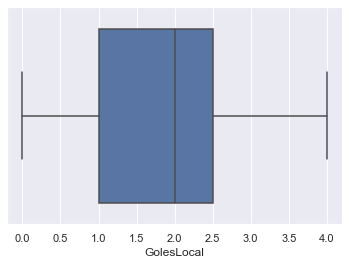

In [12]:
sns.boxplot(x=Madrid_Tot_7['GolesLocal'])
plt.show()

In [13]:
Madrid_Tot_7['GolesVisitante'].describe()

count    19.000000
mean      1.631579
std       1.498537
min       0.000000
25%       0.500000
50%       1.000000
75%       2.500000
max       4.000000
Name: GolesVisitante, dtype: float64

In [14]:
Madrid_Tot_7['GolesVisitante'].sum()

31.0

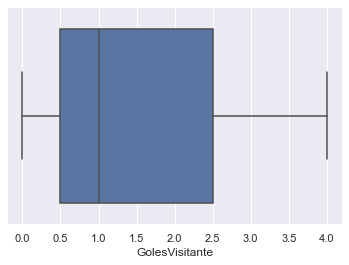

In [15]:
sns.boxplot(x=Madrid_Tot_7['GolesVisitante'])
plt.show()

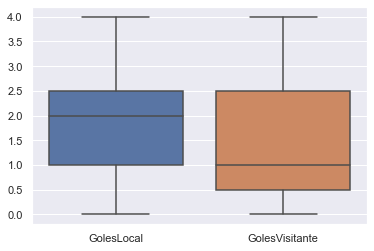

In [16]:
sns.boxplot(data=Madrid_Tot_7.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


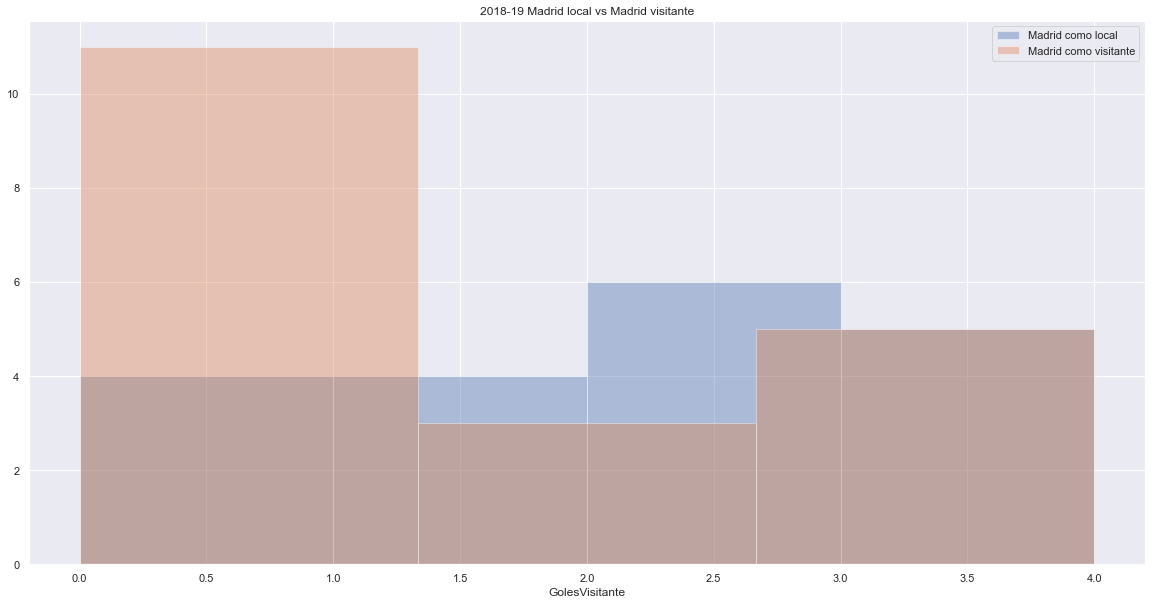

In [17]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_7['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_7['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2018-19 Madrid local vs Madrid visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2018-19 Madrid local vs Madrid visitante')

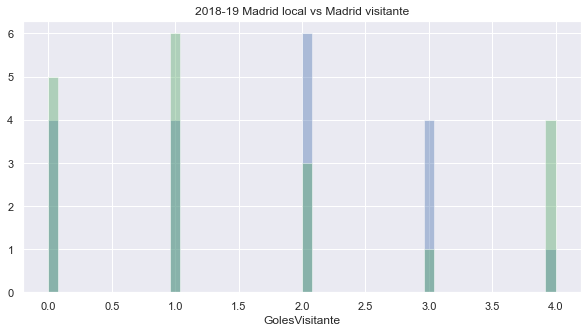

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_7['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_7['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2018-19 Madrid local vs Madrid visitante")

In [19]:
BarsaL_7 = df_laliga_2018y19.loc[df_laliga_2018y19['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_7.reset_index(inplace=True)
BarsaL_7

,index,GolesLocal
0,4,3.0
1,27,8.0
2,48,2.0
3,61,1.0
4,83,4.0
5,97,5.0
6,116,3.0
7,137,2.0
8,164,2.0
9,187,3.0


In [20]:
BarsaV_7 = df_laliga_2018y19.loc[df_laliga_2018y19['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_7.reset_index(inplace=True)
BarsaV_7

,index,GolesVisitante
0,14,1.0
1,31,2.0
2,52,1.0
3,78,1.0
4,103,3.0
5,124,1.0
6,144,4.0
7,158,5.0
8,178,2.0
9,205,2.0


In [39]:
BarsaTot_7=pd.merge(BarsaL_7, BarsaV_7, left_index=True, right_index=True)
BarsaTot_7['GolesTotales']=BarsaTot_7['GolesLocal']+BarsaTot_7['GolesVisitante']
BarsaTot_7

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,4,3.0,14,1.0,4.0
1,27,8.0,31,2.0,10.0
2,48,2.0,52,1.0,3.0
3,61,1.0,78,1.0,2.0
4,83,4.0,103,3.0,7.0
5,97,5.0,124,1.0,6.0
6,116,3.0,144,4.0,7.0
7,137,2.0,158,5.0,7.0
8,164,2.0,178,2.0,4.0
9,187,3.0,205,2.0,5.0


In [27]:
BarsaTot_7['GolesLocal'].describe()

count    19.000000
mean      2.684211
std       1.634783
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: GolesLocal, dtype: float64

In [22]:
BarsaTot_7['GolesLocal'].sum()

51.0

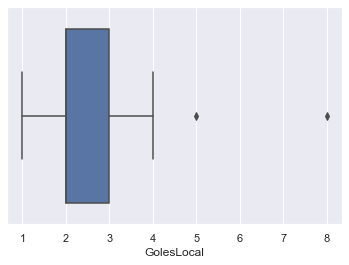

In [23]:
sns.boxplot(x=BarsaTot_7['GolesLocal'])
plt.show()

In [26]:
BarsaTot_7['GolesVisitante'].describe()

count    19.000000
mean      2.052632
std       1.544657
min       0.000000
25%       1.000000
50%       2.000000
75%       3.500000
max       5.000000
Name: GolesVisitante, dtype: float64

In [24]:
BarsaTot_7['GolesVisitante'].sum()

39.0

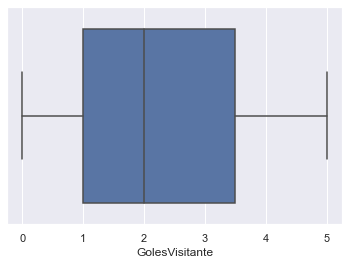

In [25]:
sns.boxplot(x=BarsaTot_7['GolesVisitante'])
plt.show()

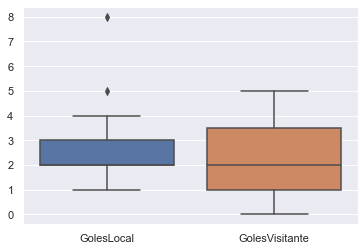

In [28]:
sns.boxplot(data=BarsaTot_7.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


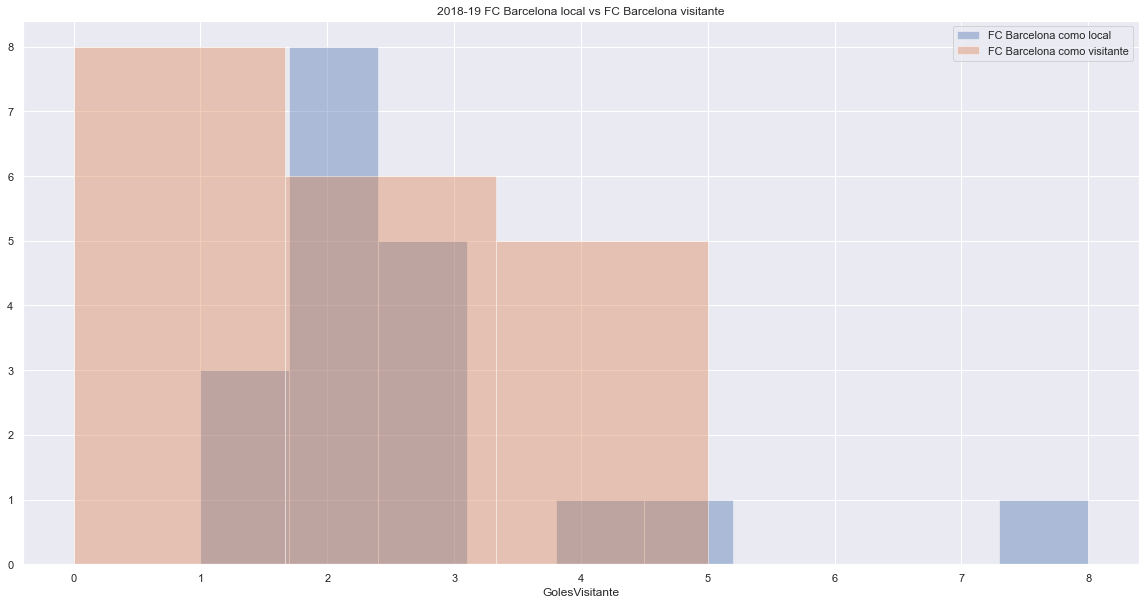

In [29]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_7['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_7['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2018-19 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2018-19 FC Barcelona local vs FC Barcelona visitante')

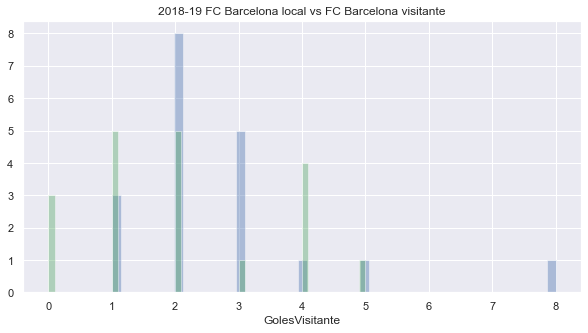

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_7['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_7['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2018-19 FC Barcelona local vs FC Barcelona visitante")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


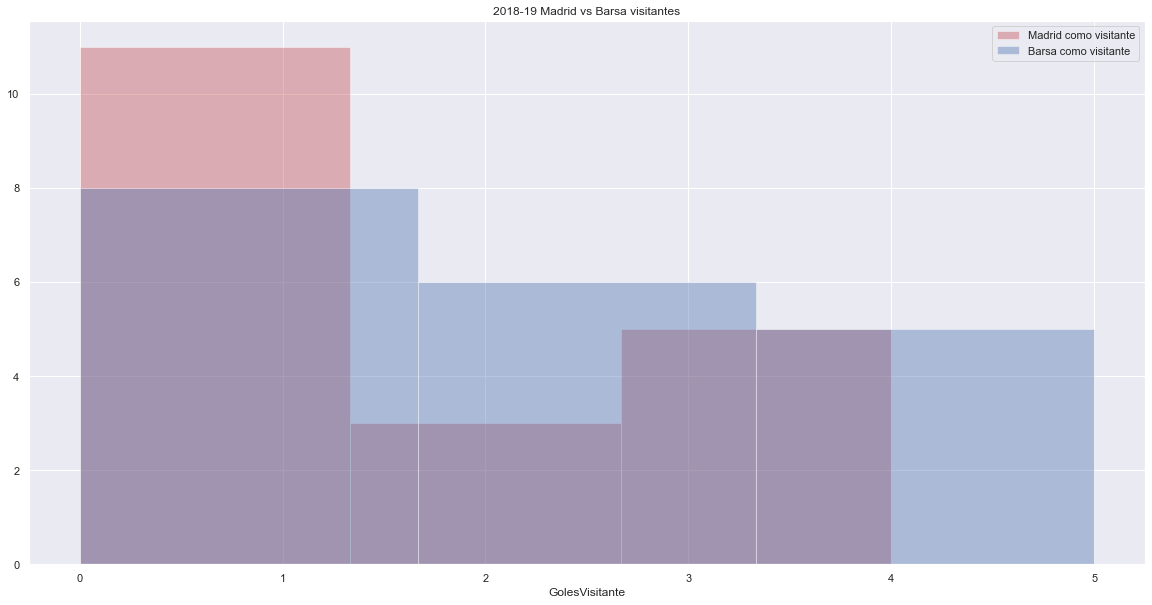

In [31]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_7['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_7['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2018-19 Madrid vs Barsa visitantes")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


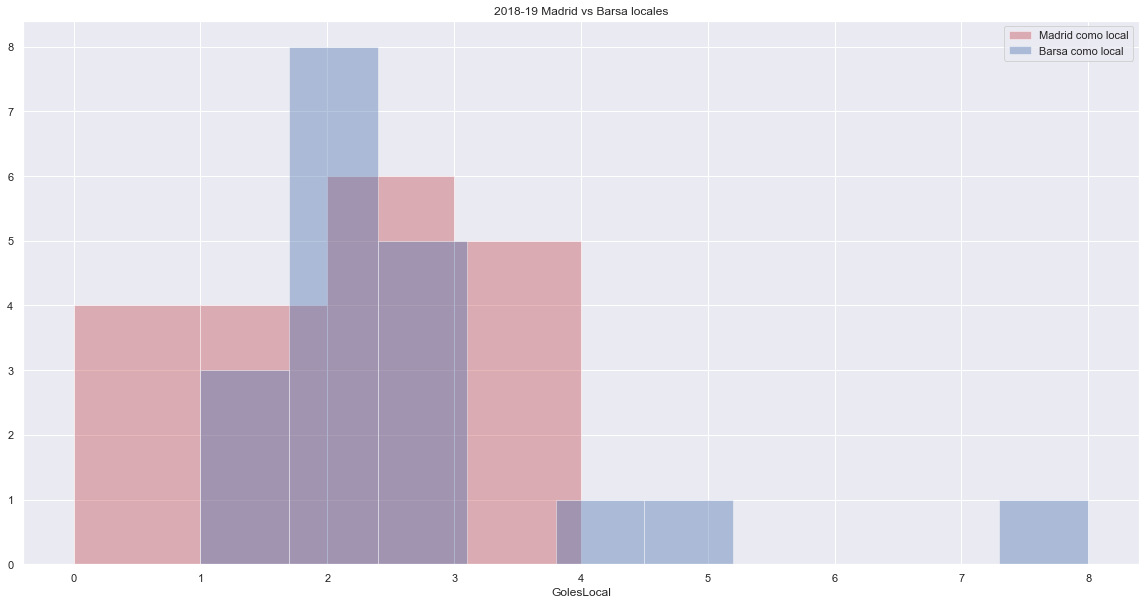

In [32]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_7['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_7['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2018-19 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2018-19 Partidos x número de goles')

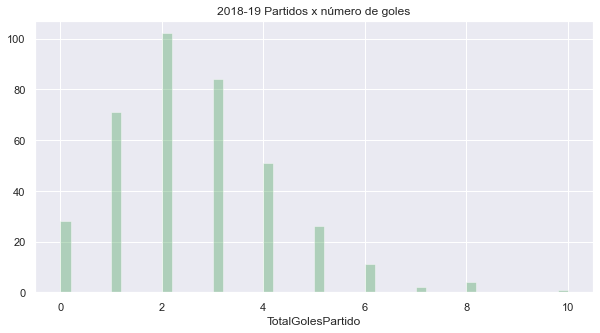

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2018y19['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);
plt.title("2018-19 Partidos x número de goles")

Text(0.5, 1.0, '2018-19 Equipos de LaLiga goles como Locales')

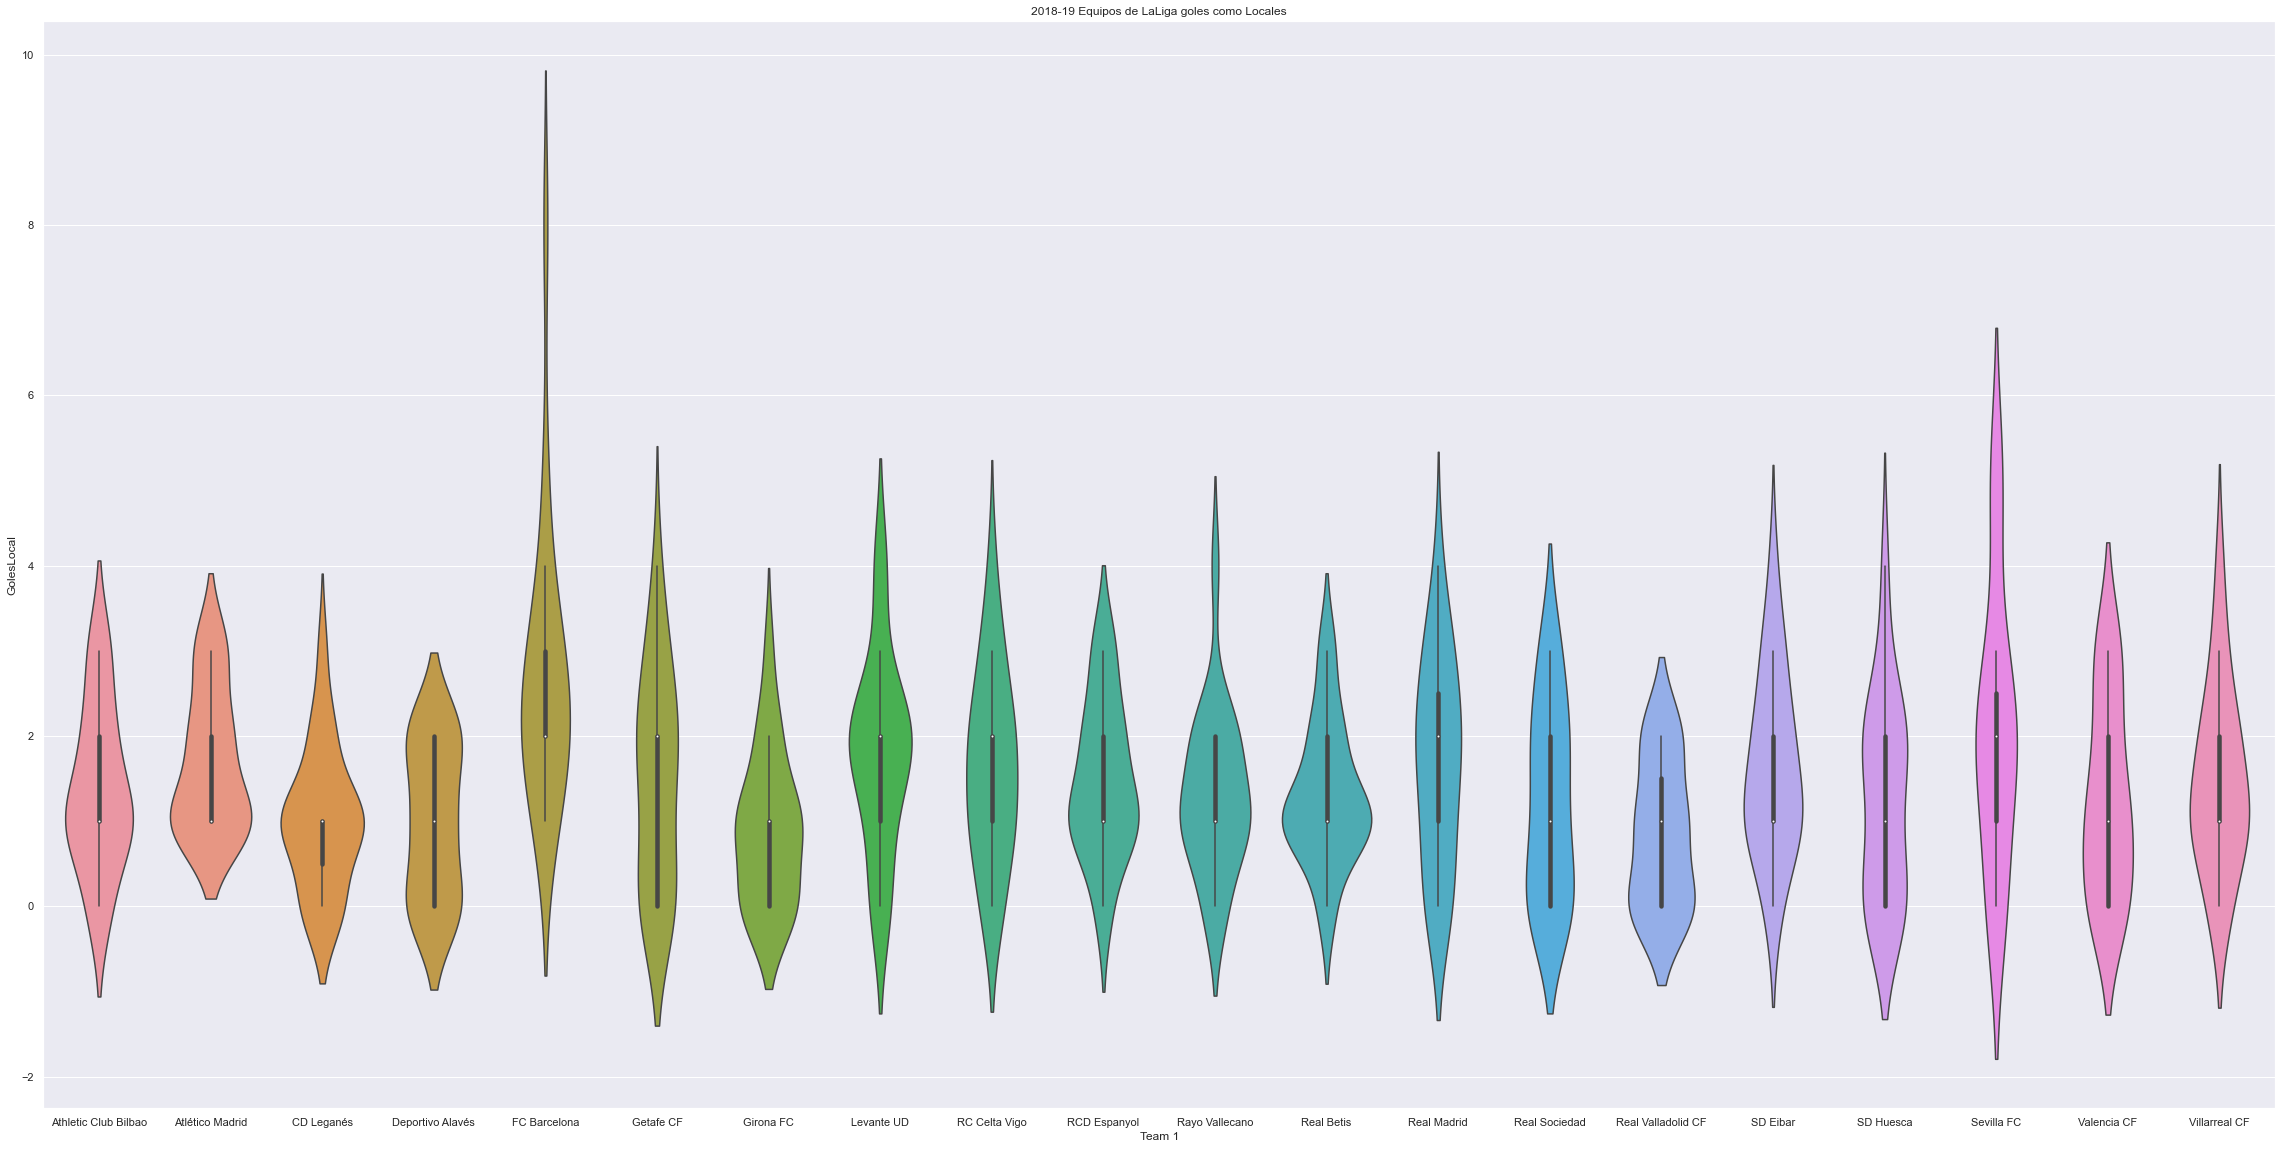

In [37]:
plt.figure(figsize=(40,20))
sns.violinplot(x=df_laliga_2018y19['Team 1'].sort_values(), y=df_laliga_2018y19['GolesLocal'])
plt.title("2018-19 Equipos de LaLiga goles como Locales")

Text(0.5, 1.0, '2018-19 Equipos de LaLiga goles como Visitantes')

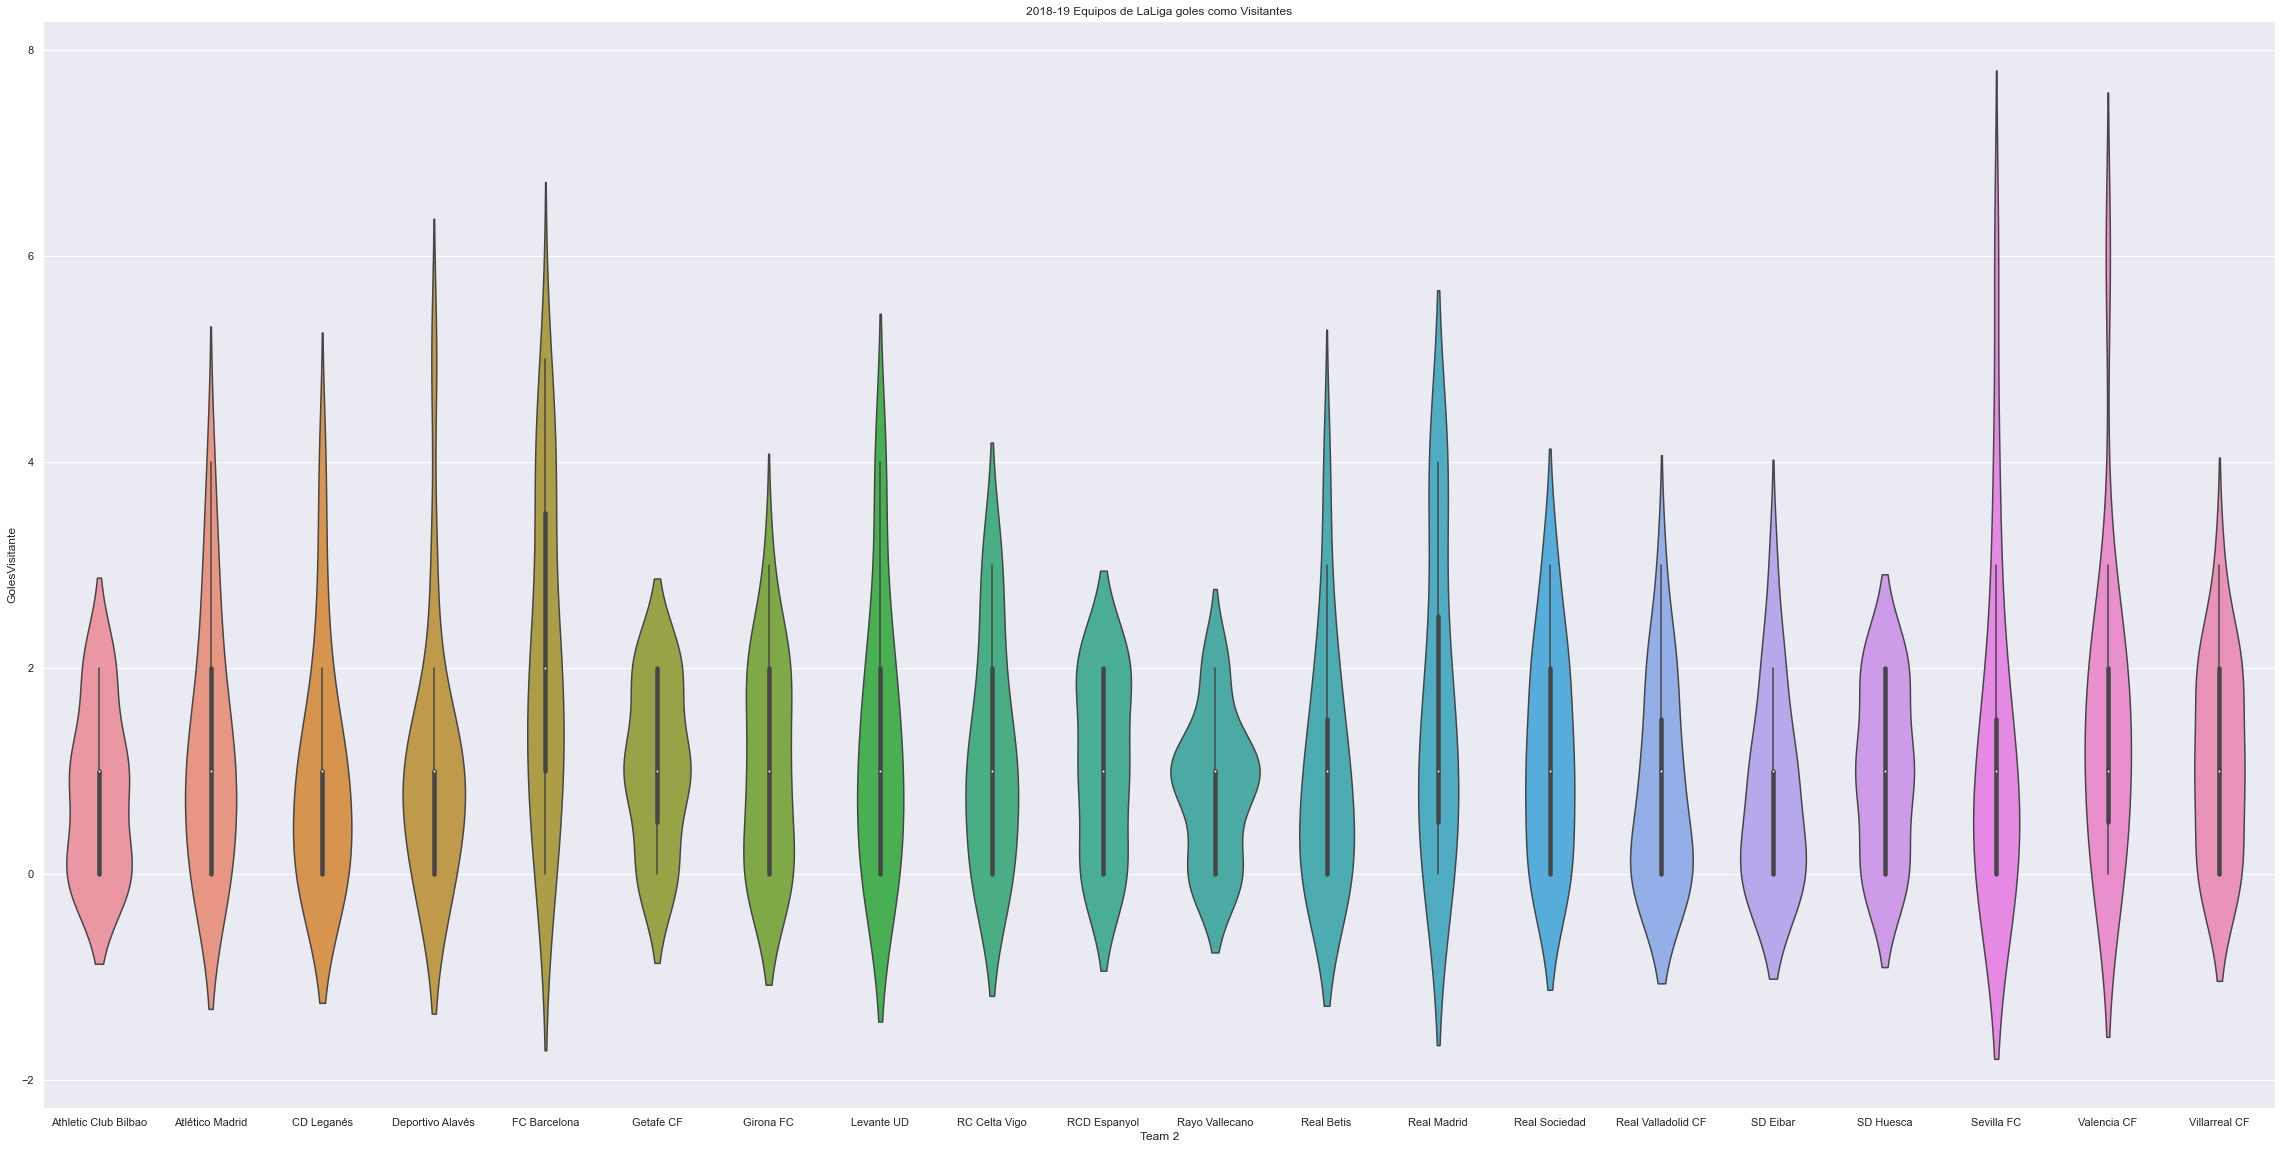

In [36]:
plt.figure(figsize=(40,20))
sns.violinplot(x=df_laliga_2018y19['Team 2'].sort_values(), y=df_laliga_2018y19['GolesVisitante'])
plt.title("2018-19 Equipos de LaLiga goles como Visitantes")

Ganador FC Barcelona

In [38]:
Madrid_Tot_7['GolesTotales'].sum()

63.0

In [40]:
BarsaTot_7['GolesTotales'].sum()

90.0